In [52]:
# Importing all Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import plotly.graph_objs as go
import plotly.subplots as sp
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from scipy.stats import mstats
import warnings
plt.style.use('dark_background')
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/Life Expectancy Data.csv


In [53]:
#Reading the dataset
df=pd.read_csv('/kaggle/input/Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [54]:
#Size of the Dataset
df.shape

(2938, 22)

In [55]:
#Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [56]:
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('/kaggle/input/Life Expectancy Data.csv')

# Step 1: Check for missing values before imputation
print("Missing values before imputation:\n", df.isnull().sum())

# Step 2: Replace the Null Values with median values of the data
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# List of columns to impute with median
columns_to_impute = [
    'Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 
    ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP', 
    'Population', ' thinness  1-19 years', ' thinness 5-9 years', 
    'Income composition of resources', 'Schooling'
]

# Impute each column
for column in columns_to_impute:
    df[column] = imputer.fit_transform(df[[column]])

# Step 3: Check for missing values after imputation
print("Missing values after imputation:\n", df.isnull().sum())

# Step 4: Handle the 'Status' column
df['Status'] = df['Status'].map({'Developed': 1, 'Developing': 0})

# If there are still NaN values in 'Status', fill them if necessary
df['Status'].fillna(-1, inplace=True)  # Using -1 for unknown or missing status

# Create a cleaned dataset
cleaned_df = df.copy()

# Save the cleaned DataFrame to a CSV file
cleaned_df.to_csv('cleaned_life_expectancy_data.csv', index=False)

# Step 5: Display the cleaned DataFrame and summary statistics
print("First few rows of the cleaned DataFrame:\n", cleaned_df.head())



Missing values before imputation:
 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
Missing values after imputation:
 Country                            0
Year                   

In [57]:
#Stastical Analysis
df.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,0.174268,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,0.379405,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,0.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,0.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,0.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [58]:
#Displaying top 5 rows
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [59]:
# Data exploration
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculating correlation matrix
correlation_matrix = numeric_df.corr()

# Displaying first five rows of the correlation matrix
correlation_matrix.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,-0.001864,0.170819,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,0.108484,-0.042937,0.091388,0.074552,0.131373,-0.139741,0.091480,0.014027,-0.047827,-0.050859,0.236594,0.203517
Status,-0.001864,1.000000,0.481415,-0.314894,-0.112252,0.579662,0.454261,0.127008,-0.076955,0.309371,-0.115195,0.218628,0.290431,0.215281,-0.148590,0.445981,-0.037606,-0.365814,-0.364179,0.460677,0.492984
Life expectancy,0.170819,0.481415,1.000000,-0.696390,-0.196769,0.388918,0.381418,0.170219,-0.157767,0.556901,-0.222738,0.458399,0.208844,0.472211,-0.556703,0.430461,-0.029014,-0.468002,-0.462473,0.688662,0.713054
Adult Mortality,-0.079535,-0.314894,-0.696390,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,-0.379092,0.094280,-0.270002,-0.111796,-0.270301,0.523886,-0.281434,-0.005292,0.296135,0.301634,-0.436332,-0.433415
infant deaths,-0.037415,-0.112252,-0.196769,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,-0.226796,0.996629,-0.170896,-0.126268,-0.175376,0.025231,-0.102829,0.551667,0.464811,0.470445,-0.141571,-0.190951


In [60]:
# Get numerical columns from cleaned_df
numerical_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate IQR and percentage of outliers
outlier_percentage = {}

for col in numerical_cols:
    Q1 = cleaned_df[col].quantile(0.25)  # First quartile
    Q3 = cleaned_df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_count = cleaned_df[(cleaned_df[col] < lower_bound) | (cleaned_df[col] > upper_bound)].shape[0]
    total_count = cleaned_df[col].shape[0]
    
    # Calculate outlier percentage
    outlier_percentage[col] = (outliers_count / total_count) * 100

# Output the results
for col, percentage in outlier_percentage.items():
    print(f"Percentage of outliers in {col}: {percentage:.2f}%")



Percentage of outliers in Year: 0.00%
Percentage of outliers in Status: 17.43%
Percentage of outliers in Life expectancy : 0.58%
Percentage of outliers in Adult Mortality: 2.93%
Percentage of outliers in infant deaths: 10.72%
Percentage of outliers in Alcohol: 0.10%
Percentage of outliers in percentage expenditure: 13.24%
Percentage of outliers in Hepatitis B: 10.96%
Percentage of outliers in Measles : 18.45%
Percentage of outliers in  BMI : 0.00%
Percentage of outliers in under-five deaths : 13.41%
Percentage of outliers in Polio: 9.50%
Percentage of outliers in Total expenditure: 1.74%
Percentage of outliers in Diphtheria : 10.14%
Percentage of outliers in  HIV/AIDS: 18.45%
Percentage of outliers in GDP: 15.15%
Percentage of outliers in Population: 15.38%
Percentage of outliers in  thinness  1-19 years: 3.40%
Percentage of outliers in  thinness 5-9 years: 3.37%
Percentage of outliers in Income composition of resources: 4.42%
Percentage of outliers in Schooling: 2.62%


Shape before applying Winsorization: (2938, 22)


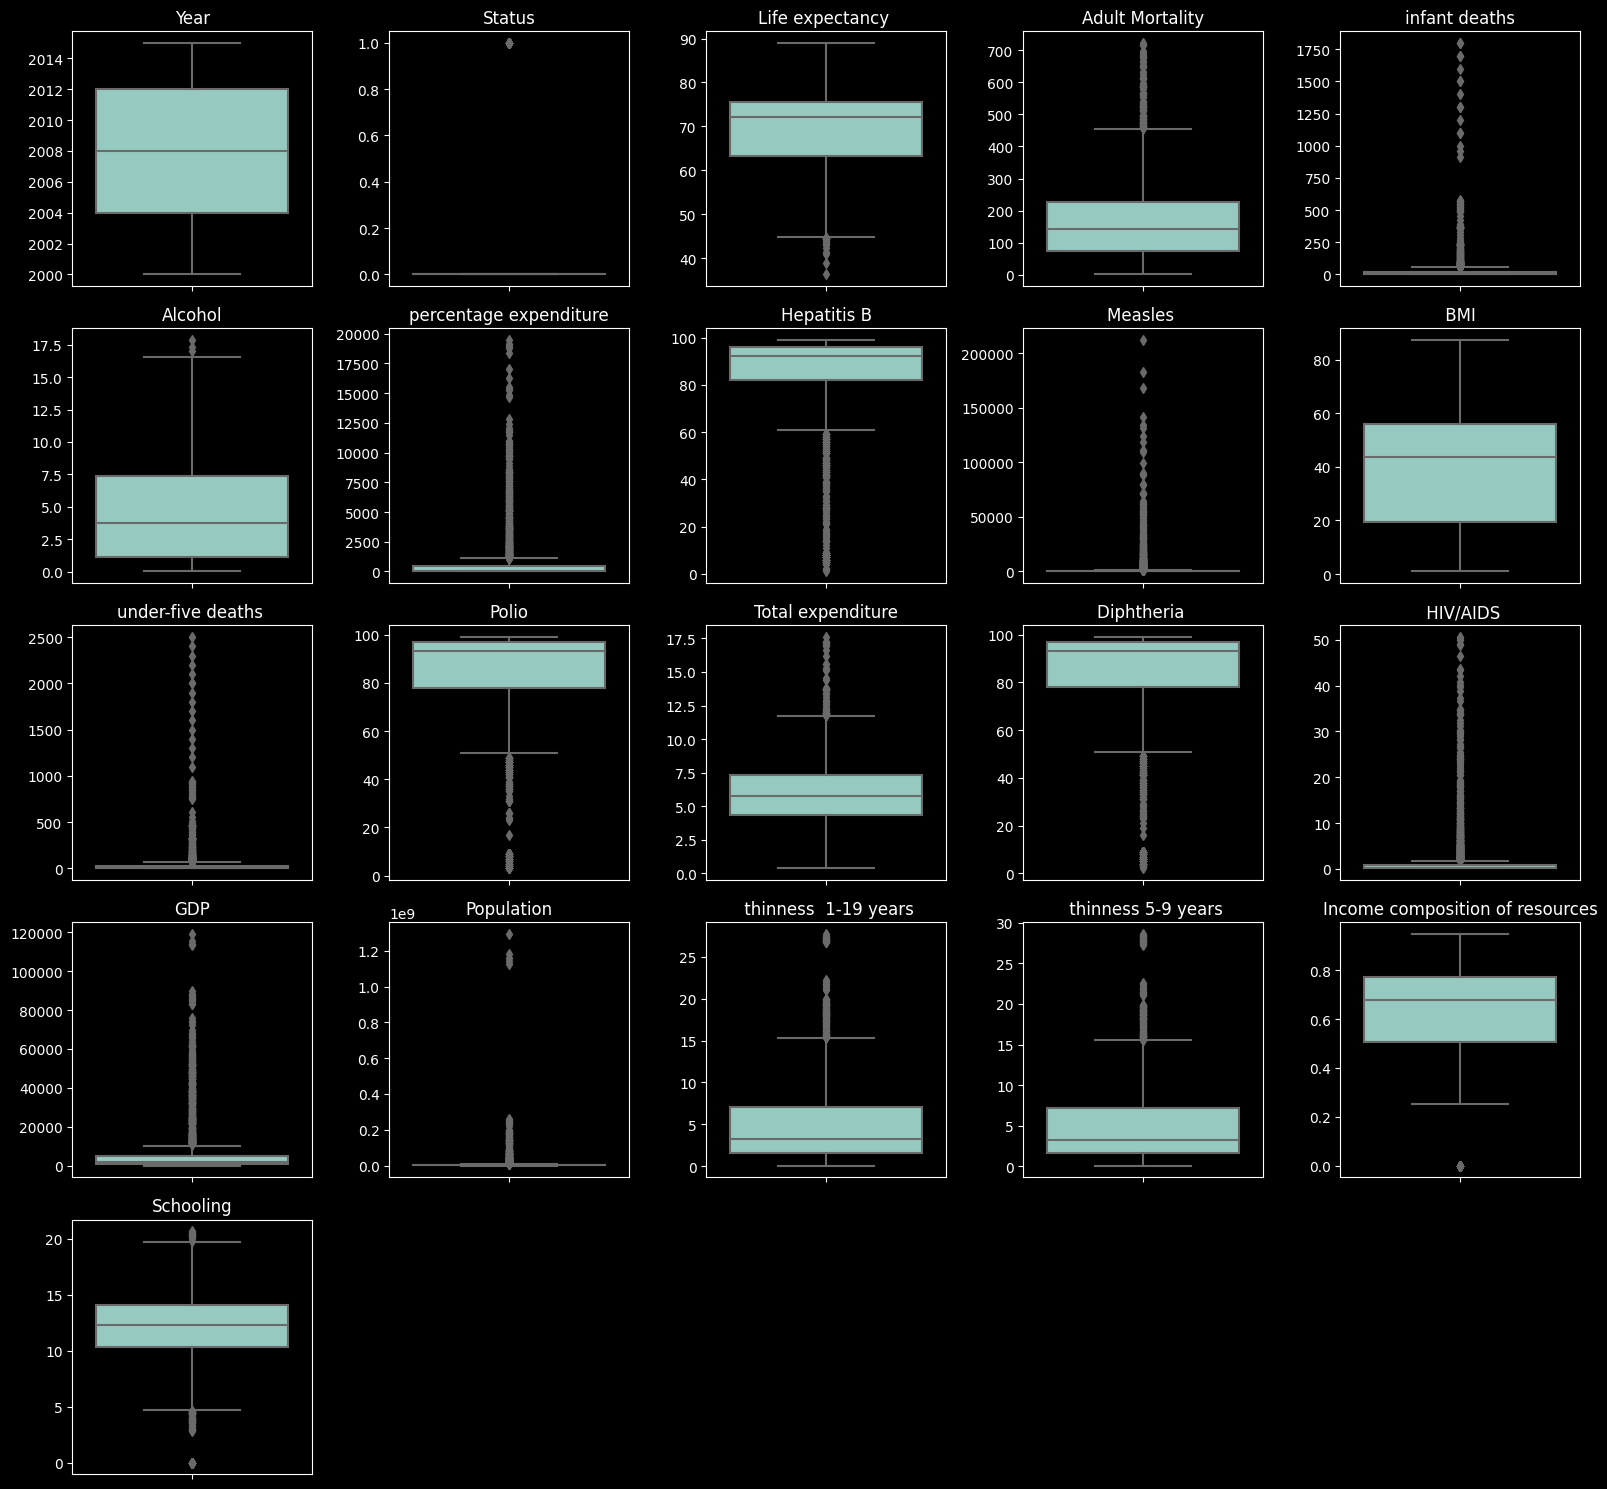

In [61]:
# Display shape before outlier detection
print("Shape before applying Winsorization:", cleaned_df.shape)

# Create box plots for each numerical column to visualize outliers
nrows = (len(numerical_cols) // 5) + (len(numerical_cols) % 5 > 0)
plt.figure(figsize=(16, nrows * 3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(nrows, 5, i)  # Create subplot
    sns.boxplot(data=cleaned_df, y=col)  # Box plot for the cleaned DataFrame
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()

Shape of the DataFrame after Winsorization: (2938, 22)


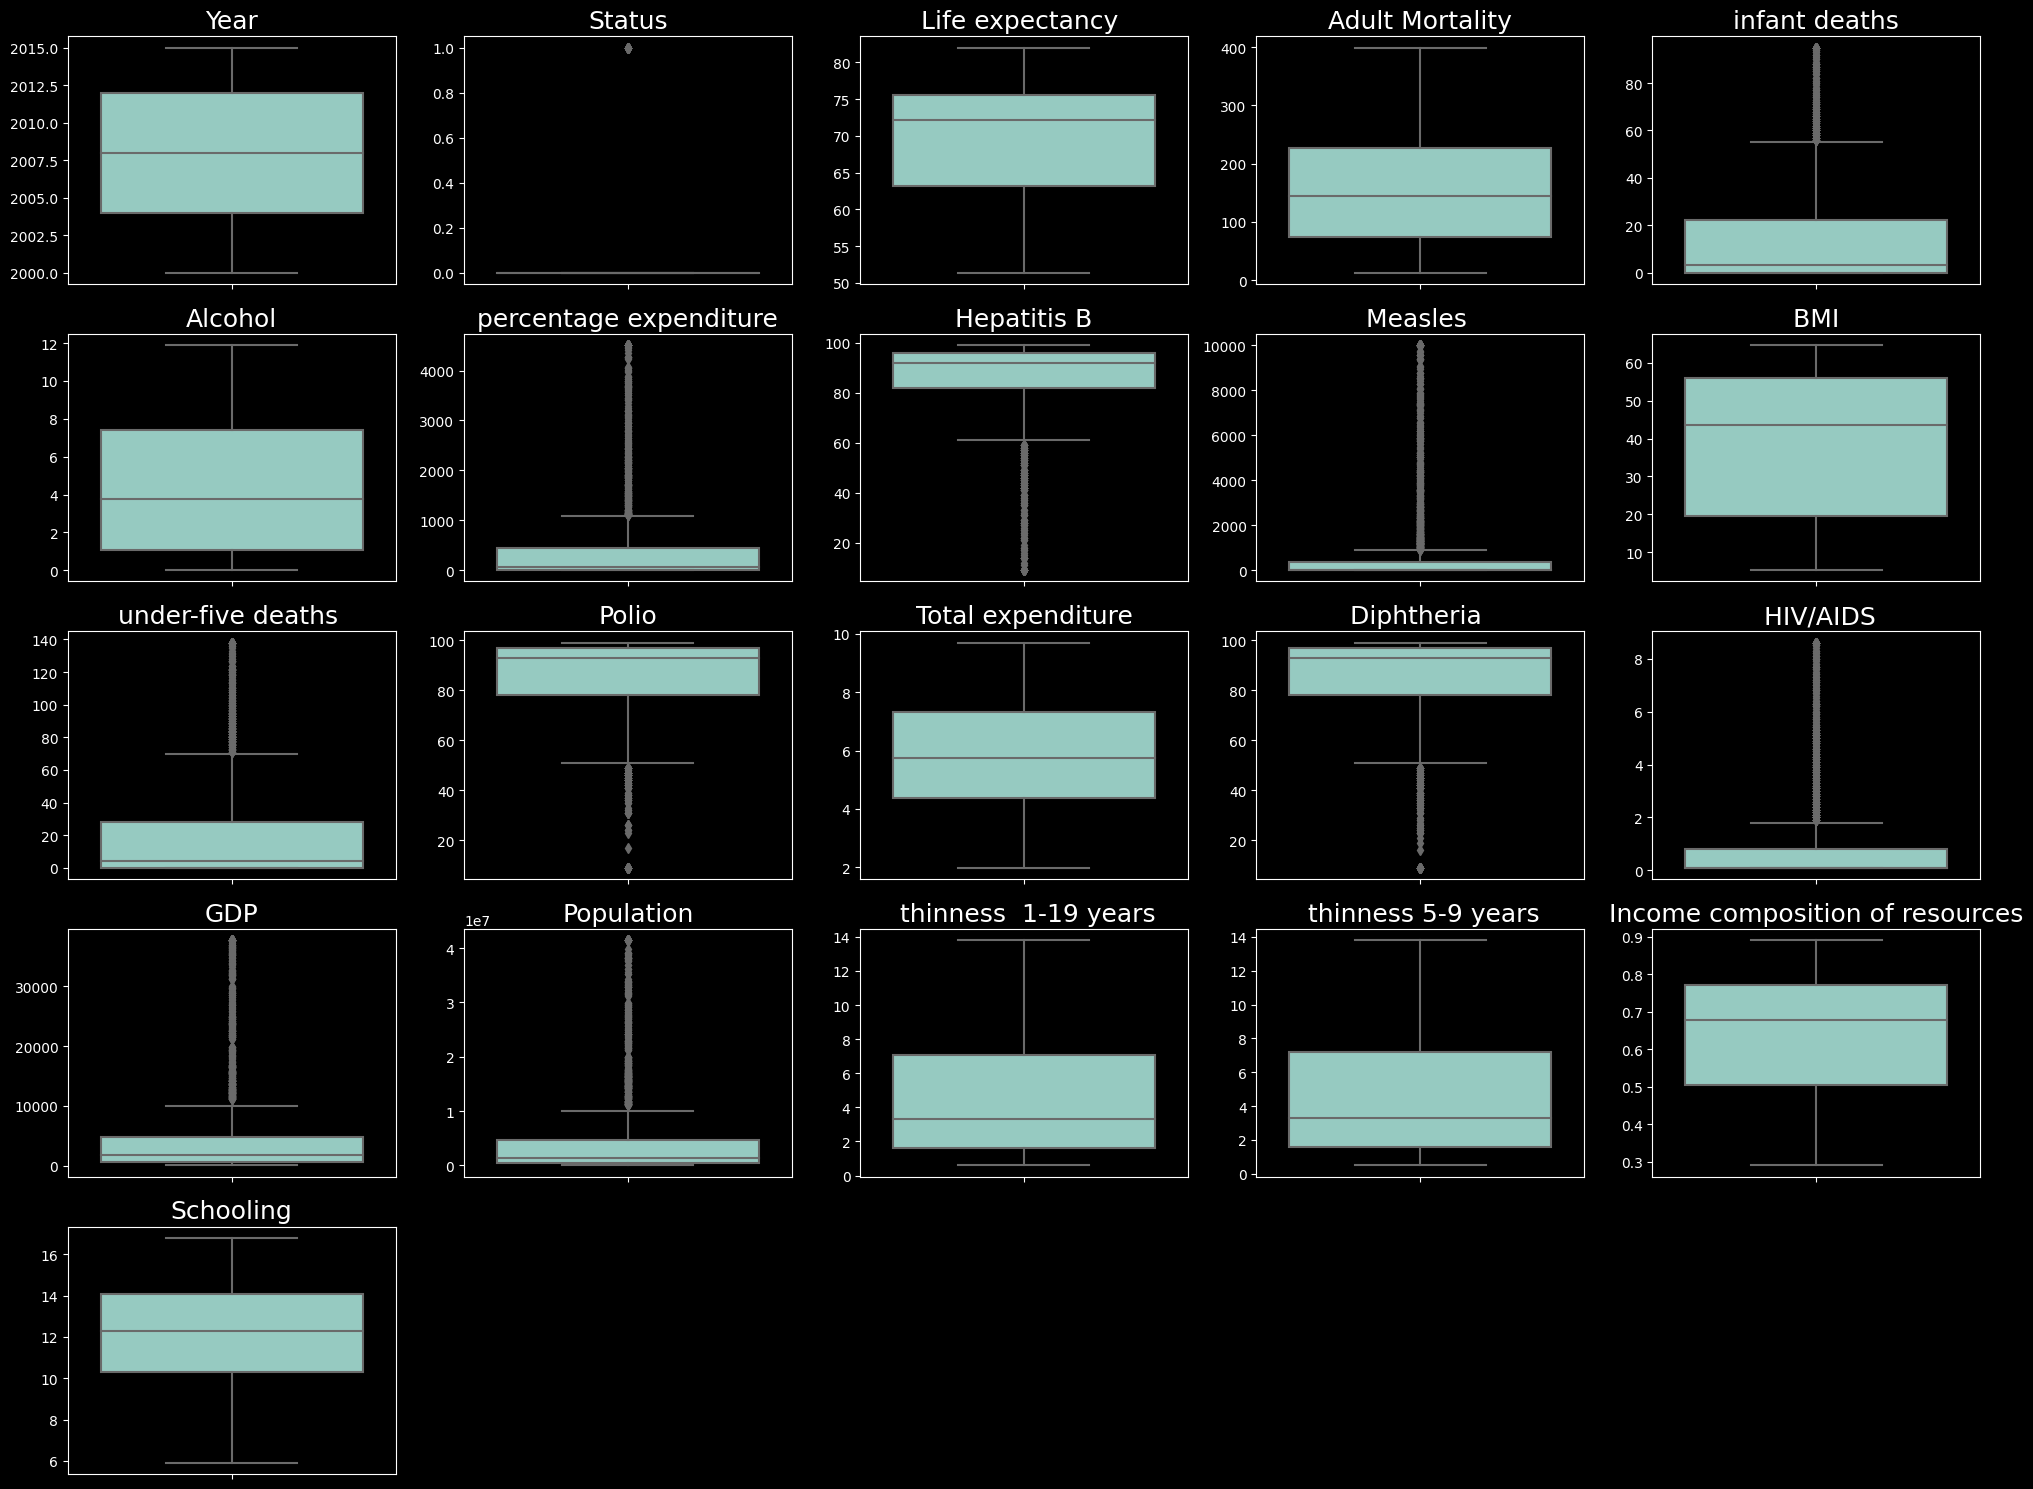

In [62]:
from scipy.stats import mstats

# Identify all numerical columns
numerical_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Handling Outliers: Winsorization for all numerical columns
for column in numerical_cols:
    cleaned_df[column] = mstats.winsorize(cleaned_df[column], limits=[0.05, 0.05])
    
# Print the shape of the DataFrame after Winsorization
print("Shape of the DataFrame after Winsorization:", cleaned_df.shape)

# Box Plot Visualization After Winsorization
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) // 5) + (len(numerical_cols) % 5 > 0), 5, i)
    sns.boxplot(y=cleaned_df[column])
    plt.title(column, fontsize=18)
    plt.ylabel('')
plt.tight_layout()
plt.show()


In [63]:
# Calculate outliers percentage after Winsorization
outlier_percentages = {}

for column in numerical_cols:
    outliers = detect_outliers_iqr(cleaned_df, column)
    outlier_count = len(outliers)
    total_count = len(cleaned_df)
    
    # Calculate percentage of outliers
    outlier_percentage = (outlier_count / total_count) * 100
    outlier_percentages[column] = outlier_percentage

# Convert to DataFrame for better visualization
outlier_percentage_df = pd.DataFrame(outlier_percentages.items(), columns=['Column', 'Outlier Percentage'])
print(outlier_percentage_df)


                             Column  Outlier Percentage
0                              Year            0.000000
1                            Status           17.426821
2                  Life expectancy             0.000000
3                   Adult Mortality            0.000000
4                     infant deaths           10.721579
5                           Alcohol            0.000000
6            percentage expenditure           13.240300
7                       Hepatitis B           10.959837
8                          Measles            18.447924
9                              BMI             0.000000
10               under-five deaths            13.410483
11                            Polio            9.496256
12                Total expenditure            0.000000
13                      Diphtheria            10.142954
14                         HIV/AIDS           18.447924
15                              GDP           15.146358
16                       Population           15

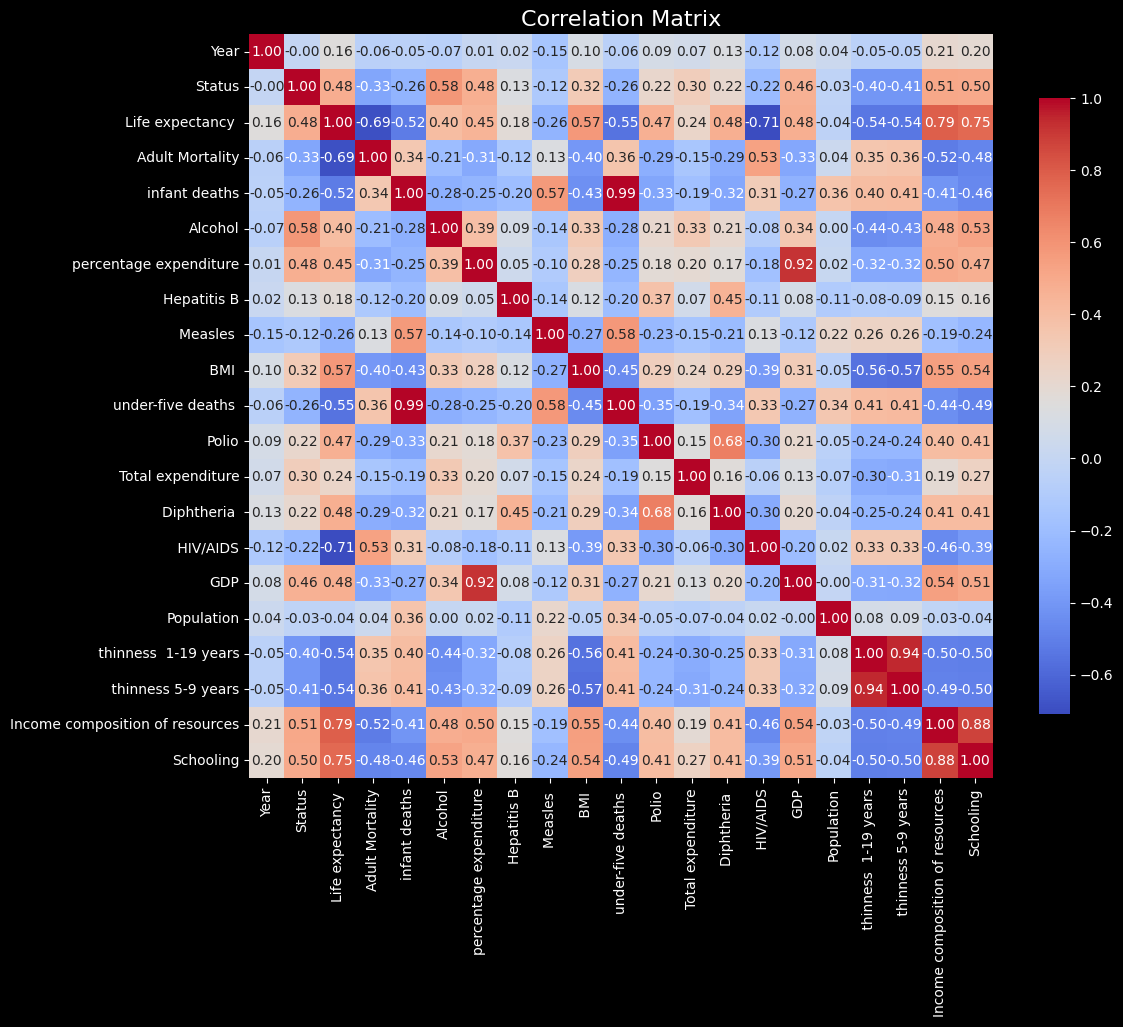

In [64]:
# Select only numeric columns
numeric_df = cleaned_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set title
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [65]:

# Group by 'Country' and take the mean value of 'Life expectancy '
country_life_expectancy = cleaned_df.groupby('Country')['Life expectancy '].mean()

# Plot the histogram for unique countries
fig = px.histogram(country_life_expectancy, x='Life expectancy ', nbins=30, template='plotly_dark')
fig.show()

In [66]:
# Creating an animated line plot of life expectancy by country over the years
fig=px.line(cleaned_df.sort_values(by='Year'),x='Year',y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig.show()

In [67]:
# Define the countries for comparison
developed_countries = ['Japan', 'United States of America']
developing_countries = ['India', 'Nigeria']

# Filtering the cleaned DataFrame for these countries
filtered_df = cleaned_df[cleaned_df['Country'].isin(developed_countries + developing_countries)]

# Creating a subplot with 2 rows and 2 columns
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=developed_countries + developing_countries)

# Defining colors for each country
colors = ['red', 'blue', 'orange', 'white']
country_labels = developed_countries + developing_countries

# Adding a line plot for each country with specific colors and both lines and markers
for i, country in enumerate(country_labels):
    country_data = filtered_df[filtered_df['Country'] == country]
    
    fig.add_trace(
        go.Scatter(
            x=country_data['Year'],
            y=country_data['Life expectancy '],
            mode='lines+markers',
            line=dict(color=colors[i]),
            name=country
        ),
        row=i // 2 + 1, 
        col=i % 2 + 1
    )

# Updating layout parameters
fig.update_layout(
    height=600, 
    width=700, 
    title_text='Life Expectancy Over Years for Selected Countries',
    template='plotly_dark',
    showlegend=True,
)

# Show the plot
fig.show()


In [68]:
top_data = pd.DataFrame(df.groupby('Country')['Life expectancy '].mean().sort_values(ascending = False).head(10))
bottom_data = pd.DataFrame(df.groupby('Country')['Life expectancy '].mean().sort_values(ascending = True).head(10))

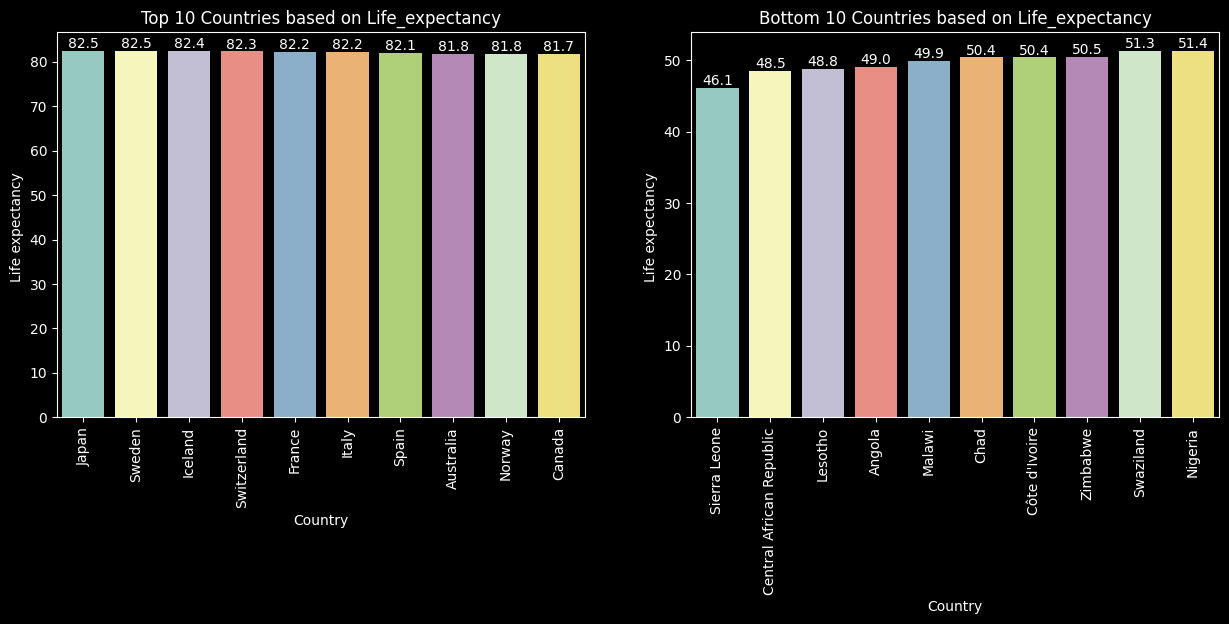

In [69]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Top 10 Countries based on Life_expectancy')
ax1 = sns.barplot(top_data,x = top_data.index, y = 'Life expectancy ')
ax1.bar_label(ax1.containers[0], fmt = '%.1f')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Bottom 10 Countries based on Life_expectancy')
ax2 = sns.barplot(bottom_data,x = bottom_data.index, y = 'Life expectancy ')
ax2.bar_label(ax2.containers[0], fmt = '%.1f')
plt.xticks(rotation=90)
plt.show()

In [70]:
developed_countries = ['Japan', 'United States of America']
developing_countries = ['India', 'Nigeria']

# Filtering the DataFrame for these countries
filtered_df = cleaned_df[cleaned_df['Country'].isin(developed_countries + developing_countries)]

# Defining custom colors for each country
custom_colors = ['orange', 'red', 'white', 'blue']

# Creating scatter plot for filtered countries with custom colors
fig = px.scatter(
    filtered_df,
    y='Adult Mortality',
    x='Life expectancy ',
    color='Country',
    size='Life expectancy ',
    color_discrete_sequence=custom_colors,
    template='plotly_dark',
    opacity=0.6,
    title='<b> Life Expectancy Versus Adult Mortality',
    labels={'Adult Mortality': 'Adult Mortality Rate', 'Life expectancy ': 'Life Expectancy'},
)

# Show the plot
fig.show()


<Axes: title={'center': 'General Government Expenditure on Health as a Percentage of Total Government Expenditure (%)'}, xlabel='Total Percentage', ylabel='Count'>

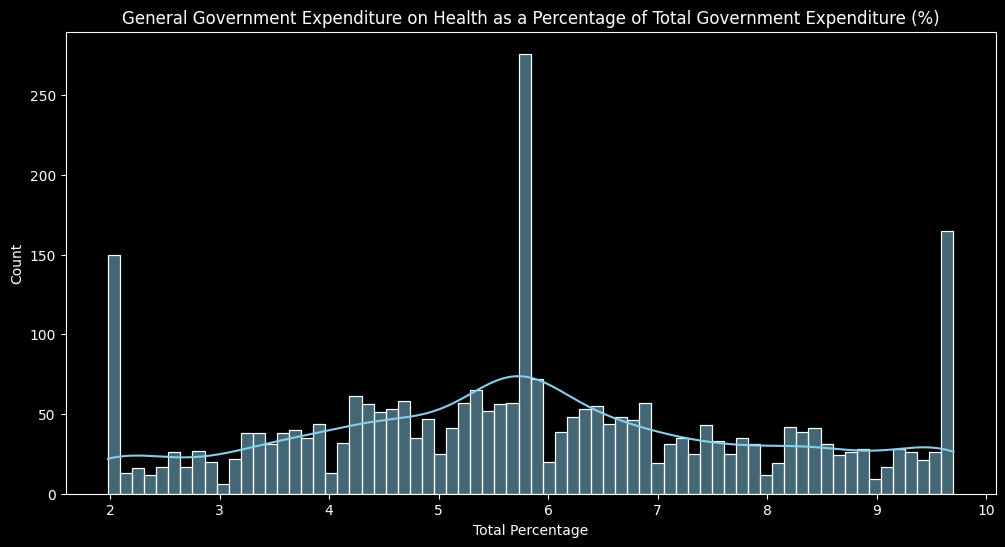

In [71]:
# Plotting a histogram of total government expenditure on health

plt.figure(figsize=(12, 6))
plt.title('General Government Expenditure on Health as a Percentage of Total Government Expenditure (%)')
plt.xlabel('Total Percentage')
plt.ylabel('Count')

sns.histplot(cleaned_df, x='Total expenditure',bins=70, color='skyblue', kde=True)

In [72]:
developed_countries = ['Japan', 'United States of America']
developing_countries = ['India', 'Nigeria']

# Filtering the DataFrame for these countries
filtered_df = cleaned_df[cleaned_df['Country'].isin(developed_countries + developing_countries)]

# Creating a bar chart for life expectancy
fig = px.bar(
    filtered_df,
    x='Country', 
    y='Life expectancy ', 
    color='Country',  # Coloring by country
    template='plotly_dark',
    title='Life Expectancy for Selected Countries',
    labels={'Life expectancy ': 'Life Expectancy (years)', 'Country': 'Country'},
)

# Show the plot
fig.show()


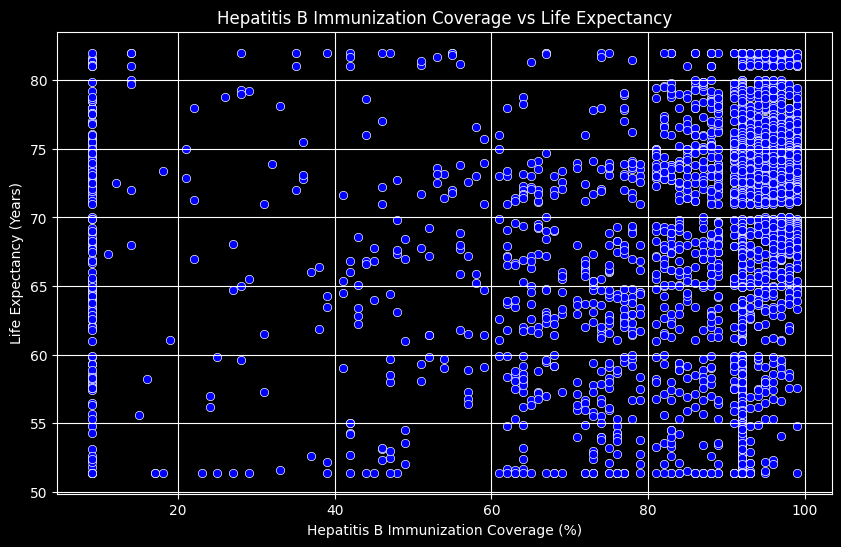

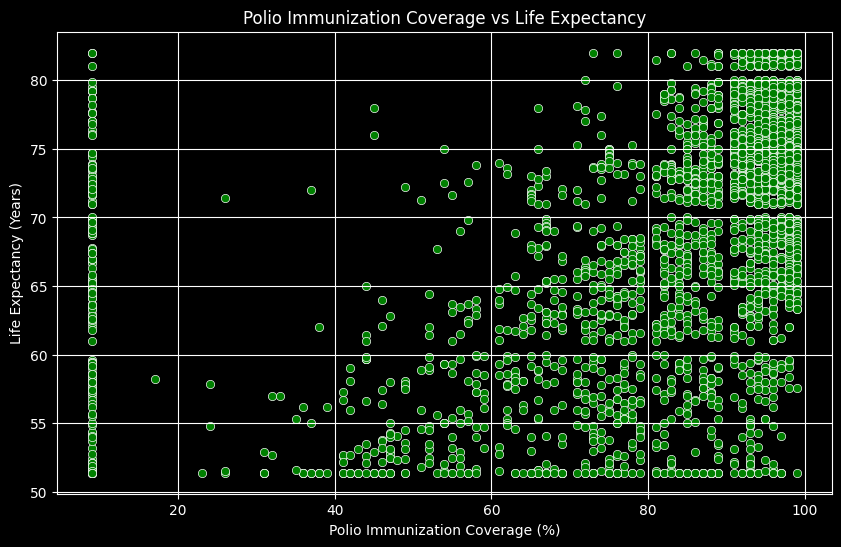

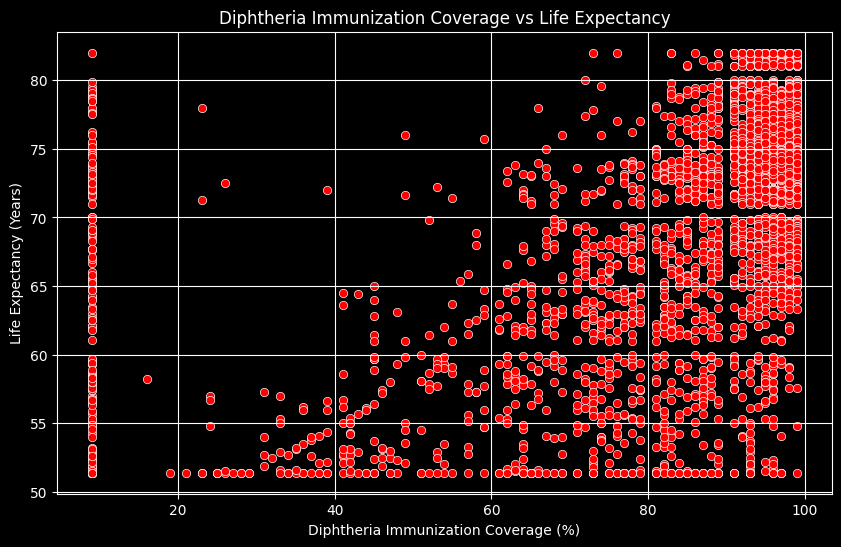

In [73]:
# Scatter plot for Hepatitis B immunization coverage vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='Hepatitis B', y='Life expectancy ', color='blue')
plt.title('Hepatitis B Immunization Coverage vs Life Expectancy')
plt.xlabel('Hepatitis B Immunization Coverage (%)')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.show()

# Scatter plot for Polio immunization coverage vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='Polio', y='Life expectancy ', color='green')
plt.title('Polio Immunization Coverage vs Life Expectancy')
plt.xlabel('Polio Immunization Coverage (%)')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.show()

# Scatter plot for Diphtheria immunization coverage vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='Diphtheria ', y='Life expectancy ', color='red')
plt.title('Diphtheria Immunization Coverage vs Life Expectancy')
plt.xlabel('Diphtheria Immunization Coverage (%)')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.show()


In [74]:
# Check column names in cleaned_df
print(cleaned_df.columns)


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [75]:
# Filter dataset for specific countries
target_countries = ['Japan', 'United States of America', 'India', 'Nigeria']
filtered_data = cleaned_df[cleaned_df['Country'].isin(target_countries)]

# Add a 'Development Status' column
filtered_data['Development Status'] = filtered_data['Country'].apply(
    lambda x: 'Developed' if x in ['Japan', 'United States of America'] else 'Developing'
)

print("Filtered and labeled data for target countries loaded successfully!")


Filtered and labeled data for target countries loaded successfully!


In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Strip leading and trailing spaces from column names
filtered_data.columns = filtered_data.columns.str.strip()

# Check the updated column names
print(filtered_data.columns.tolist())

# Updated features list
features = [
    'Adult Mortality',
    'infant deaths',
    'Alcohol',
    'Hepatitis B',
    'Measles',
    'BMI',
    'under-five deaths',
    'Polio',
    'Total expenditure',
    'GDP',
    'Income composition of resources',
    'Schooling'
]

# Preparing data for clustering
X = filtered_data[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-Means Clustering (using 2 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
filtered_data['Cluster'] = kmeans.fit_predict(X_scaled)

print("Clustering complete, clusters added to data!")

['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Development Status']
Clustering complete, clusters added to data!


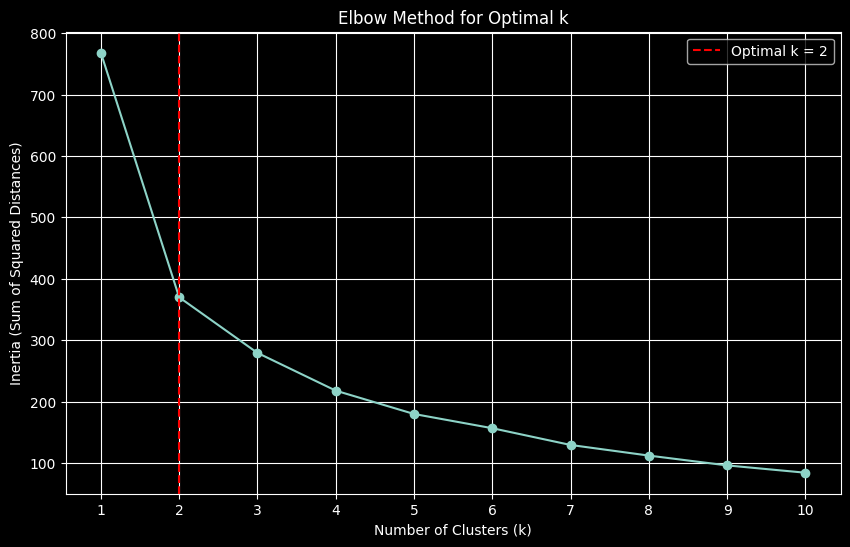

In [77]:
from sklearn.cluster import KMeans

# Range of k values to test
k_values = range(1, 11)
inertia = []

# Loop through different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_values)
plt.grid()
plt.axvline(x=2, color='r', linestyle='--', label='Optimal k = 2')
plt.legend()
plt.show()


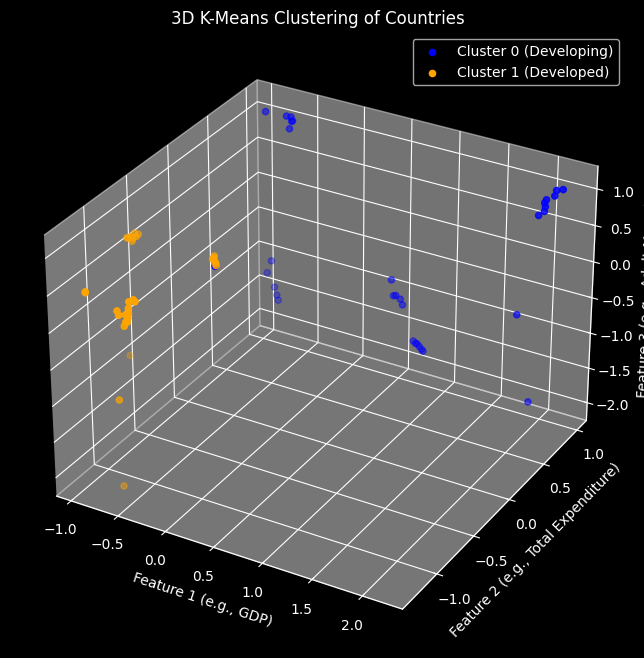

In [78]:
# Step 4: Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Cluster 0 (Developing Countries)
ax.scatter(X_scaled[filtered_data['Cluster'] == 0, 0], 
            X_scaled[filtered_data['Cluster'] == 0, 1], 
            X_scaled[filtered_data['Cluster'] == 0, 2], 
            color='blue', label='Cluster 0 (Developing)')

# Scatter plot for Cluster 1 (Developed Countries)
ax.scatter(X_scaled[filtered_data['Cluster'] == 1, 0], 
            X_scaled[filtered_data['Cluster'] == 1, 1], 
            X_scaled[filtered_data['Cluster'] == 1, 2], 
            color='orange', label='Cluster 1 (Developed)')

# Step 5: Label the plot
ax.set_title('3D K-Means Clustering of Countries')
ax.set_xlabel('Feature 1 (e.g., GDP)')
ax.set_ylabel('Feature 2 (e.g., Total Expenditure)')
ax.set_zlabel('Feature 3 (e.g., Adult Mortality)')

# Show legend
ax.legend()

# Show plot
plt.show()

In [79]:


# Print countries in Cluster 0
cluster_0_countries = filtered_data[filtered_data['Cluster'] == 0][['Country', 'Development Status']]
print("Countries in Cluster 0:")
display(cluster_0_countries)

# Print countries in Cluster 1
cluster_1_countries = filtered_data[filtered_data['Cluster'] == 1][['Country', 'Development Status']]
print("Countries in Cluster 1:")
display(cluster_1_countries)


Countries in Cluster 0:


,Country,Development Status
1186,India,Developing
1187,India,Developing
1188,India,Developing
1189,India,Developing
1190,India,Developing
1191,India,Developing
1192,India,Developing
1193,India,Developing
1194,India,Developing
1195,India,Developing


Countries in Cluster 1:


,Country,Development Status
1314,Japan,Developed
1315,Japan,Developed
1316,Japan,Developed
1317,Japan,Developed
1318,Japan,Developed
1319,Japan,Developed
1320,Japan,Developed
1321,Japan,Developed
1322,Japan,Developed
1323,Japan,Developed


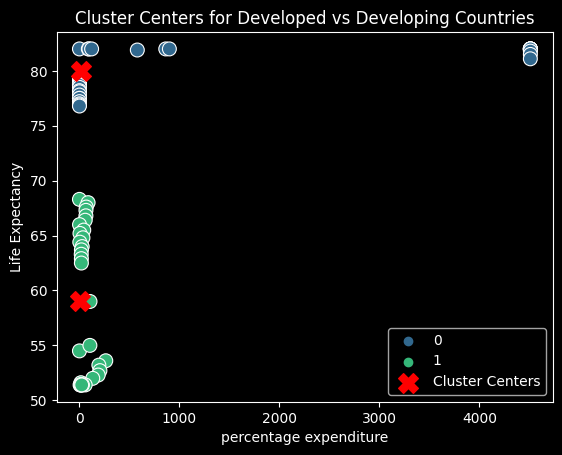

In [80]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2)
filtered_data['Cluster'] = kmeans.fit_predict(filtered_data[['Schooling', 'Life expectancy']])

# Plotting clusters with centers
sns.scatterplot(x='percentage expenditure', y='Life expectancy', hue='Cluster', data=filtered_data, palette='viridis', s=100)

# Plotting the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

plt.title("Cluster Centers for Developed vs Developing Countries")
plt.xlabel("percentage expenditure")
plt.ylabel("Life Expectancy")
plt.legend()
plt.show()


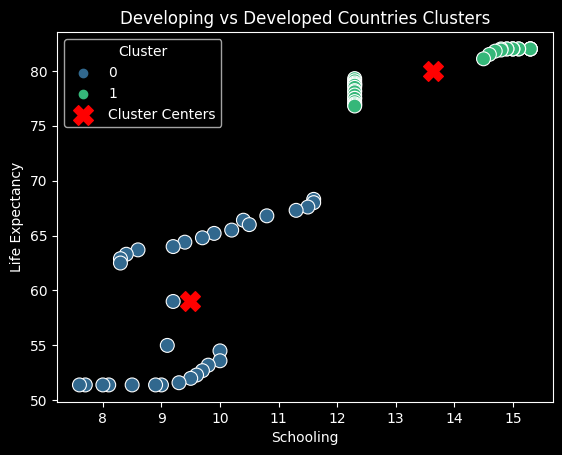

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Selecting relevant features
features = ['Schooling', 'Life expectancy']
X = filtered_data[features]

# Applying KMeans clustering
kmeans = KMeans(n_clusters=2)
filtered_data['Cluster'] = kmeans.fit_predict(X)

# Plotting the scatter plot with cluster color coding
sns.scatterplot(x='Schooling', y='Life expectancy', hue='Cluster', data=filtered_data, palette='viridis', s=100)

# Plotting the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

plt.title("Developing vs Developed Countries Clusters")
plt.xlabel("Schooling")
plt.ylabel("Life Expectancy")
plt.legend(title='Cluster')
plt.show()



In [82]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 1. Calculate the Silhouette Score
sil_score = silhouette_score(X_scaled, filtered_data['Cluster'])
print(f'Silhouette Score: {sil_score}')

# 2. Calculate the Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled, filtered_data['Cluster'])
print(f'Davies-Bouldin Index: {db_score}')

# 3. Inertia (Already calculated as part of the KMeans)
print(f'Inertia (Within-cluster sum of squares): {kmeans.inertia_}')



Silhouette Score: 0.4651924117246692
Davies-Bouldin Index: 0.936012759414247
Inertia (Within-cluster sum of squares): 1628.816875


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Hyperparameter grid for tuning
param_grid = {
    'n_clusters': [3, 4, 5, 6, 7, 8, 9, 10],  #Cluster range for efficiency
    'init': ['k-means++', 'random'],  # Different initialization methods
    'n_init': [10, 20],  # Number of initializations
    'max_iter': [300, 500],  # Max iterations
    'tol': [1e-4, 1e-3],  # Tolerance
    'random_state': [0, 42, 50]  # Different random states
}


# Prepare data for clustering (using your existing filtered_data and features)
X = filtered_data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the KMeans model
kmeans = KMeans()

# Set up GridSearchCV with KMeans and hyperparameter grid
grid_search = GridSearchCV(kmeans, param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_scaled)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Use the best KMeans model from the grid search
best_kmeans = grid_search.best_estimator_

# Add clusters to the filtered_data using the best model
filtered_data['Cluster'] = best_kmeans.predict(X_scaled)

# Evaluate the performance of the tuned model

# Calculate silhouette score
sil_score = silhouette_score(X_scaled, filtered_data['Cluster'])
print(f"Silhouette Score (Tuned): {sil_score}")

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled, filtered_data['Cluster'])
print(f"Davies-Bouldin Index (Tuned): {db_score}")

# Calculate Inertia
inertia_score = best_kmeans.inertia_
print(f"Inertia (Tuned): {inertia_score}")


Fitting 3 folds for each of 384 candidates, totalling 1152 fits
[CV] END init=k-means++, max_iter=300, n_clusters=3, n_init=10, random_state=0, tol=0.0001; total time=   0.0s
[CV] END init=k-means++, max_iter=300, n_clusters=3, n_init=10, random_state=50, tol=0.0001; total time=   0.0s
[CV] END init=k-means++, max_iter=300, n_clusters=3, n_init=10, random_state=50, tol=0.001; total time=   0.0s
[CV] END init=k-means++, max_iter=300, n_clusters=3, n_init=20, random_state=0, tol=0.0001; total time=   0.0s
[CV] END init=k-means++, max_iter=300, n_clusters=3, n_init=20, random_state=0, tol=0.001; total time=   0.0s
[CV] END init=k-means++, max_iter=300, n_clusters=3, n_init=20, random_state=42, tol=0.0001; total time=   0.0s
[CV] END init=k-means++, max_iter=300, n_clusters=3, n_init=20, random_state=50, tol=0.0001; total time=   0.0s
[CV] END init=k-means++, max_iter=300, n_clusters=3, n_init=20, random_state=50, tol=0.0001; total time=   0.0s
[CV] END init=k-means++, max_iter=300, n_clus

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Hyperparameter grid for tuning
param_grid = {
    'n_clusters': [3, 4, 5, 6, 7, 8, 9, 10, 12, 15],  # Smaller range but more focused on higher values
    'init': ['k-means++', 'random'],  # Keep both initialization methods to check performance
    'n_init': [10, 15, 20, 25],  # Increasing number of initializations can help find a better solution
    'max_iter': [300, 500, 700],  # Use more iterations for better convergence
    'tol': [1e-4, 1e-3, 1e-5],  # Try different tolerance values for stopping criteria
    'random_state': [0, 42, 50, 100, 200],  # Vary random_state for reproducibility and robustness
}

# Prepare data for clustering
X = filtered_data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the KMeans model
kmeans = KMeans()

# Set up RandomizedSearchCV with KMeans and hyperparameter grid
random_search = RandomizedSearchCV(kmeans, param_distributions=param_grid, 
                                   n_iter=50, cv=3, verbose=2, 
                                   n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to find the best parameters
random_search.fit(X_scaled)

# Get the best parameters found by RandomizedSearchCV
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Use the best KMeans model from the random search
best_kmeans = random_search.best_estimator_

# Add clusters to the filtered_data using the best model
filtered_data['Cluster'] = best_kmeans.predict(X_scaled)

# Evaluate the performance of the tuned model

# Calculate silhouette score
sil_score = silhouette_score(X_scaled, filtered_data['Cluster'])
print(f"Silhouette Score (Tuned): {sil_score}")

# Calculate Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled, filtered_data['Cluster'])
print(f"Davies-Bouldin Index (Tuned): {db_score}")

# Calculate Inertia
inertia_score = best_kmeans.inertia_
print(f"Inertia (Tuned): {inertia_score}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END init=random, max_iter=500, n_clusters=4, n_init=10, random_state=42, tol=0.0001; total time=   0.0s
[CV] END init=random, max_iter=500, n_clusters=4, n_init=10, random_state=42, tol=0.001; total time=   0.0s
[CV] END init=random, max_iter=500, n_clusters=4, n_init=10, random_state=42, tol=0.001; total time=   0.0s
[CV] END init=random, max_iter=500, n_clusters=4, n_init=10, random_state=42, tol=0.001; total time=   0.0s
[CV] END init=random, max_iter=500, n_clusters=4, n_init=10, random_state=50, tol=0.0001; total time=   0.0s
[CV] END init=random, max_iter=500, n_clusters=4, n_init=10, random_state=50, tol=0.0001; total time=   0.0s
[CV] END init=random, max_iter=500, n_clusters=4, n_init=10, random_state=50, tol=0.0001; total time=   0.0s
[CV] END init=random, max_iter=500, n_clusters=4, n_init=10, random_state=50, tol=0.001; total time=   0.0s
[CV] END init=random, max_iter=500, n_clusters=4, n_init=10, random_st

In [85]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
import numpy as np
import pandas as pd

# Map clusters to ground truth labels
def map_clusters_to_labels(cluster_labels, ground_truth):
    mapping = {}
    unique_clusters = np.unique(cluster_labels)
    for cluster in unique_clusters:
        # Find the most common ground truth label in the cluster
        majority_label = ground_truth[cluster_labels == cluster].mode()[0]
        mapping[cluster] = majority_label
    return np.array([mapping[label] for label in cluster_labels])

# Calculate metrics
def calculate_metrics(cluster_labels, ground_truth):
    mapped_labels = map_clusters_to_labels(cluster_labels, ground_truth)
    accuracy = accuracy_score(ground_truth, mapped_labels)
    precision = precision_score(ground_truth, mapped_labels, average='binary', pos_label='Developed')
    f1 = f1_score(ground_truth, mapped_labels, average='binary', pos_label='Developed')
    
    # Convert to percentages
    accuracy = accuracy * 100
    precision = precision * 100
    f1 = f1 * 100
    
    return accuracy, precision, f1

# Before tuning
filtered_data['Cluster_Before_Tuning'] = kmeans.fit_predict(X_scaled)
accuracy_before, precision_before, f1_before = calculate_metrics(
    filtered_data['Cluster_Before_Tuning'], 
    filtered_data['Development Status']
)

print(f"Before Tuning - Accuracy: {accuracy_before:.2f}%, Precision: {precision_before:.2f}%, F1 Score: {f1_before:.2f}%")

# After tuning
filtered_data['Cluster_After_Tuning'] = best_kmeans.predict(X_scaled)
accuracy_after, precision_after, f1_after = calculate_metrics(
    filtered_data['Cluster_After_Tuning'], 
    filtered_data['Development Status']
)

print(f"After Tuning - Accuracy: {accuracy_after:.2f}%, Precision: {precision_after:.2f}%, F1 Score: {f1_after:.2f}%")



Before Tuning - Accuracy: 100.00%, Precision: 100.00%, F1 Score: 100.00%
After Tuning - Accuracy: 100.00%, Precision: 100.00%, F1 Score: 100.00%


In [86]:
developed_countries = ['Japan', 'United States of America']
developing_countries = ['India', 'Nigeria']

developed_data = filtered_data[filtered_data['Country'].isin(developed_countries)]
developing_data = filtered_data[filtered_data['Country'].isin(developing_countries)]

filtered_data = pd.concat([developed_data, developing_data])


# Features and target variable
features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'GDP', 'Schooling', 'percentage expenditure', 'Hepatitis B']
target = 'Life expectancy'

# Prepare the data
X = filtered_data[features]  # Features
y = filtered_data[target]  # Target variable

In [87]:
# Splitting data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [88]:
# Train Multiple Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
linear_cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='r2')

# Display metrics for Linear Regression
print("Multiple Linear Regression Metrics:")
print(f"Mean Squared Error: {mse_linear}")
print(f"Mean Absolute Error: {mae_linear}")
print(f"R-squared Score: {r2_linear}")
print("Multiple Linear Regression - CV R² Scores:", linear_cv_scores)
print("Multiple Linear Regression - Mean CV R² Score:", np.mean(linear_cv_scores))

Multiple Linear Regression Metrics:
Mean Squared Error: 11.841541510677867
Mean Absolute Error: 2.901816590157667
R-squared Score: 0.9228665759884956
Multiple Linear Regression - CV R² Scores: [0.81894904 0.87944779 0.77515756 0.81871457 0.95907993]
Multiple Linear Regression - Mean CV R² Score: 0.8502697791788725


In [89]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define the parameter grid for Ridge regression
param_grid = {
    'ridge__alpha': [1e-5, 1e-4, 1e-3, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

# Create a pipeline with scaling, polynomial features, and Ridge regression
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),  # Adding Polynomial Features to capture non-linear relationships
    Ridge()
)

# Set up GridSearchCV with 10-fold cross-validation for better stability
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='r2', n_jobs=-1, verbose=3)

# Fit the model with the training data
grid_result = grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_result.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best model to make predictions
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output the evaluation metrics
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Calculate the best CV R² score
best_cv_r2 = grid_result.best_score_
print(f"Best CV R² Score: {best_cv_r2}")



Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END init=random, max_iter=500, n_clusters=8, n_init=20, random_state=42, tol=0.001; total time=   0.0s
[CV] END init=random, max_iter=500, n_clusters=8, n_init=20, random_state=42, tol=0.001; total time=   0.0s
[CV] END init=random, max_iter=500, n_clusters=9, n_init=10, random_state=0, tol=0.0001; total time=   0.0s
[CV] END init=random, max_iter=500, n_clusters=9, n_init=10, random_state=0, tol=0.001; total time=   0.0s
[CV] END init=random, max_iter=500, n_clusters=9, n_init=10, random_state=42, tol=0.0001; total time=   0.0s
[CV] END init=random, max_iter=500, n_clusters=9, n_init=10, random_state=42, tol=0.001; total time=   0.0s
[CV] END init=random, max_iter=500, n_clusters=9, n_init=10, random_state=50, tol=0.001; total time=   0.0s
[CV] END init=random, max_iter=500, n_clusters=9, n_init=10, random_state=50, tol=0.001; total time=   0.0s
[CV] END init=random, max_iter=500, n_clusters=9, n_init=20, random_state

In [90]:
# Train Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=6, min_samples_leaf=100, n_jobs=4, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rf_cv_scores = cross_val_score(random_forest_model, X_train_scaled, y_train, cv=5, scoring='r2')

# Display metrics for Random Forest Regressor
print("\nRandom Forest Regressor Metrics:")
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared Score: {r2_rf}")
print("Random Forest Regressor - CV R² Scores:", rf_cv_scores)
print("Random Forest Regressor - Mean CV R² Score:", np.mean(rf_cv_scores))


Random Forest Regressor Metrics:
Mean Squared Error: 155.0250477086624
Mean Absolute Error: 11.457675716440423
R-squared Score: -0.009802036882902154
Random Forest Regressor - CV R² Scores: [-0.07596395 -0.09803333 -0.01421127 -0.00228045 -0.02669795]
Random Forest Regressor - Mean CV R² Score: -0.04343739057550069


In [91]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2']
}

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)


# Display the metrics for the best Random Forest model
print("\nBest Random Forest Regressor Metrics:")
print(f"Mean Squared Error: {mse_best_rf}")
print(f"Mean Absolute Error: {mae_best_rf}")
print(f"R-squared Score: {r2_best_rf}")



Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV R² Score: 0.9564305715687891

Best Random Forest Regressor Metrics:
Mean Squared Error: 0.2432994548435542
Mean Absolute Error: 0.34766401098901195
R-squared Score: 0.9984151961976155


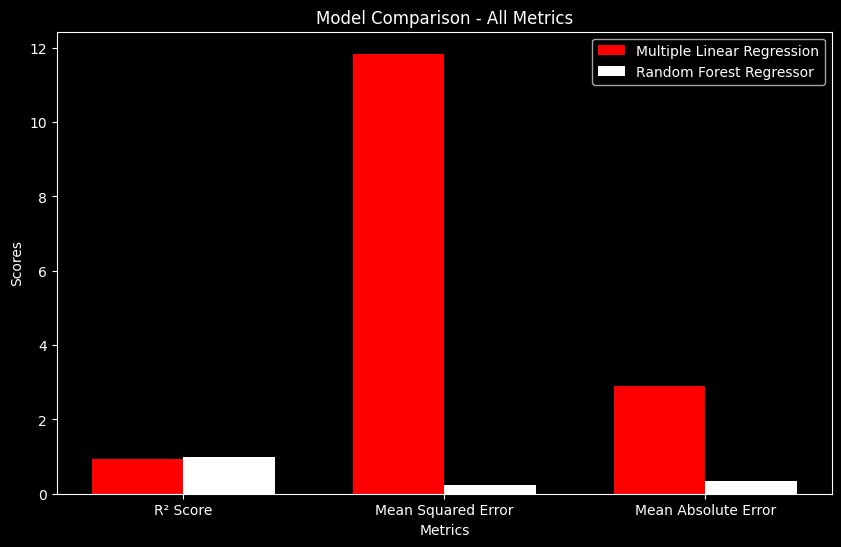

In [92]:
# For Multiple Linear Regression
lr_r2 = r2_linear
lr_mse = mse_linear
lr_mae = mae_linear

# For Random Forest Regressor
rf_r2 = r2_best_rf
rf_mse = mse_best_rf
rf_mae = mae_best_rf

# Define the metrics
metrics = ['R² Score', 'Mean Squared Error', 'Mean Absolute Error']
lr_scores = [lr_r2, lr_mse, lr_mae]
rf_scores = [rf_r2, rf_mse, rf_mae]

# Set positions for the bars
x = np.arange(len(metrics))

# Set up width for grouped bars
width = 0.35

# Plot the grouped bar chart for all metrics
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, lr_scores, width, label='Multiple Linear Regression', color='red')
plt.bar(x + width/2, rf_scores, width, label='Random Forest Regressor', color='white')

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Comparison - All Metrics')
plt.xticks(x, metrics)
plt.legend()

# Show the plot
plt.show()


Feature Importances:
Hepatitis B: 0.0024
percentage expenditure: 0.0067
GDP: 0.0137
Adult Mortality: 0.0166
Alcohol: 0.1199
Schooling: 0.4105
infant deaths: 0.4302


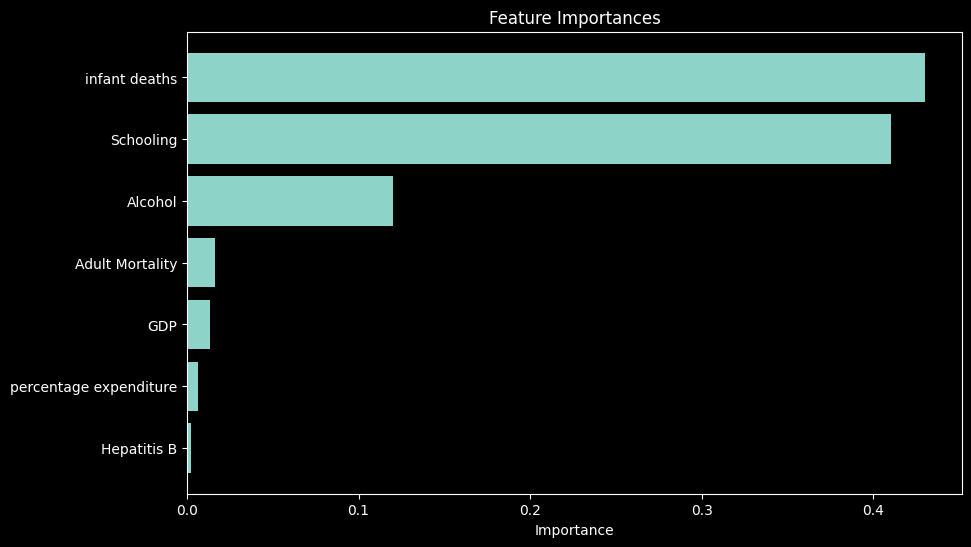

In [93]:
rf_model.fit(X_train_scaled, y_train)
# Get feature importances from the model
importances = rf_model.feature_importances_

features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'GDP', 'Schooling', 'percentage expenditure', 'Hepatitis B']

# Sort the feature importances in descending order
indices = importances.argsort()

# Print the feature importances with corresponding feature names
print("Feature Importances:")
for i in indices:
    print(f"{features[i]}: {importances[i]:.4f}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [features[i] for i in indices])
plt.xlabel("Importance")
plt.show()


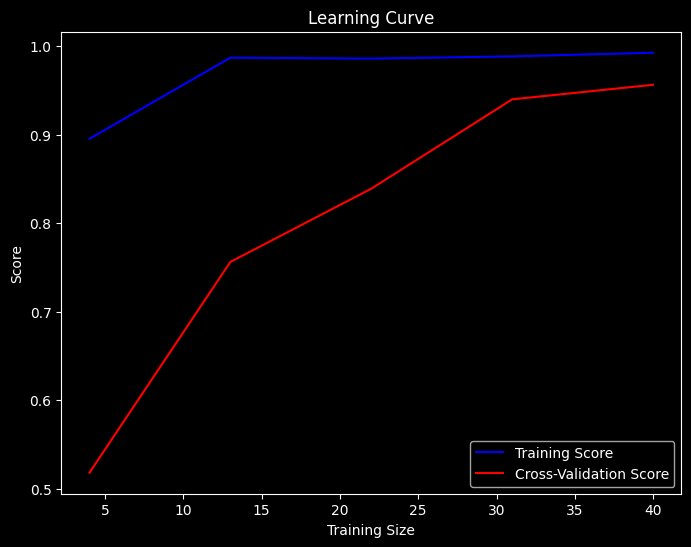

In [94]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train_scaled, y_train, cv=5)

# Mean and standard deviation of the training and test scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score", color="red")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()


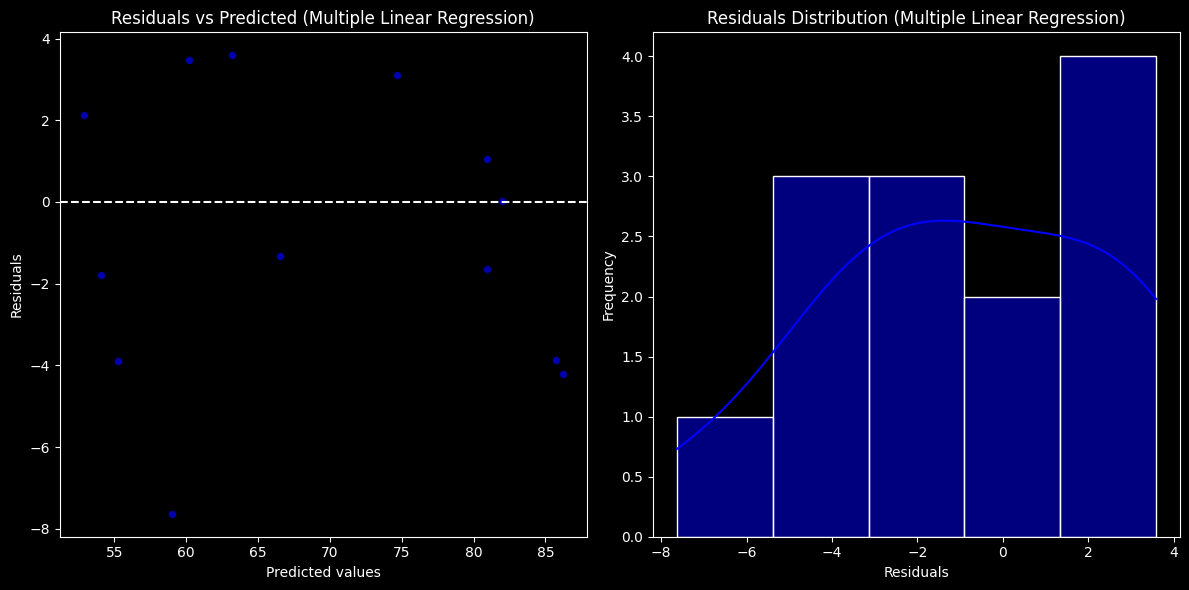

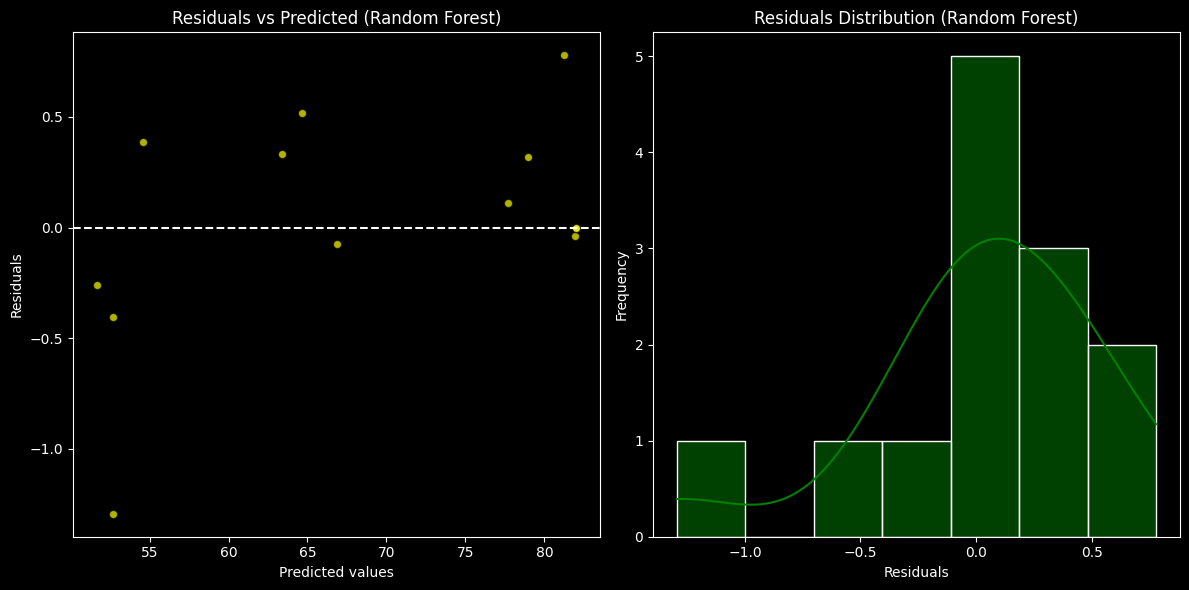

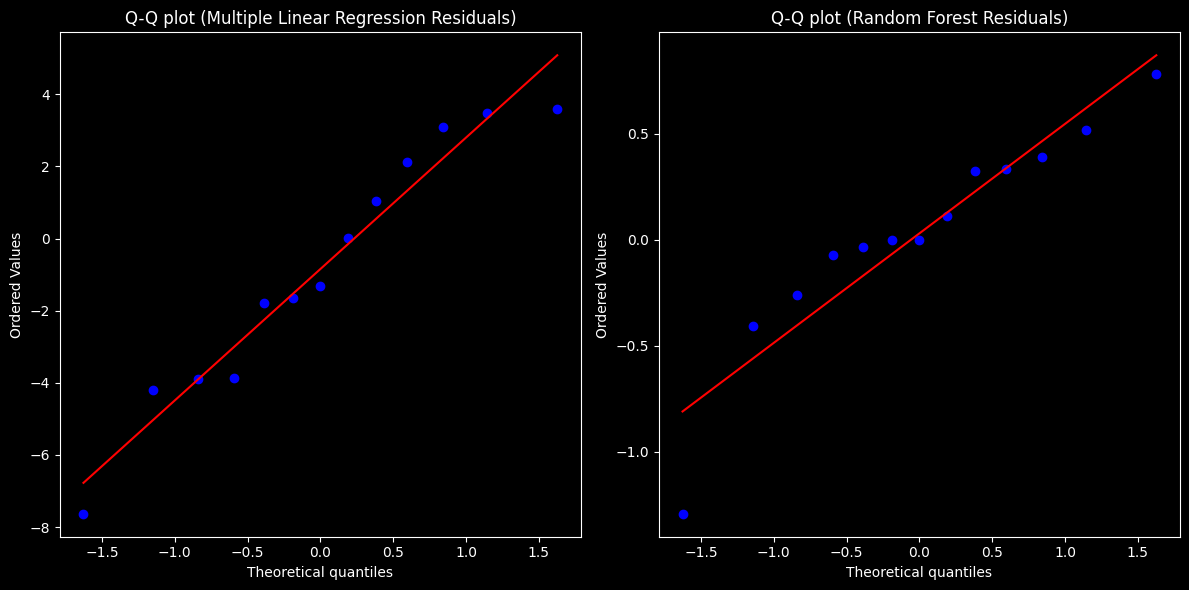

[CV] END init=k-means++, max_iter=300, n_clusters=9, n_init=25, random_state=100, tol=0.001; total time=   0.1s
[CV] END init=k-means++, max_iter=300, n_clusters=9, n_init=25, random_state=100, tol=0.001; total time=   0.1s
[CV] END init=random, max_iter=500, n_clusters=7, n_init=25, random_state=100, tol=1e-05; total time=   0.0s
[CV] END init=random, max_iter=700, n_clusters=3, n_init=20, random_state=42, tol=0.0001; total time=   0.0s
[CV] END init=random, max_iter=500, n_clusters=15, n_init=15, random_state=0, tol=0.0001; total time=   0.0s
[CV] END init=k-means++, max_iter=300, n_clusters=5, n_init=10, random_state=0, tol=0.0001; total time=   0.0s
[CV] END init=k-means++, max_iter=700, n_clusters=15, n_init=25, random_state=0, tol=0.001; total time=   0.1s
[CV] END init=k-means++, max_iter=700, n_clusters=6, n_init=15, random_state=50, tol=1e-05; total time=   0.0s
[CV] END init=k-means++, max_iter=300, n_clusters=9, n_init=15, random_state=200, tol=0.0001; total time=   0.0s
[CV

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# For Linear Regression Model
y_pred_linear = linear_model.predict(X_test_scaled)
residuals_linear = y_test - y_pred_linear

# Plotting residuals for Linear Regression
plt.figure(figsize=(12, 6))

# Residuals vs Predicted plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_pred_linear, residuals_linear, color='blue', edgecolor='black', alpha=0.7)
plt.axhline(y=0, color='white', linestyle='--')
plt.title('Residuals vs Predicted (Multiple Linear Regression)')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# Histogram of residuals for Linear Regression
plt.subplot(1, 2, 2)
sns.histplot(residuals_linear, kde=True, color='blue')
plt.title('Residuals Distribution (Multiple Linear Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# For Random Forest Regressor Model (after hyperparameter tuning)
y_pred_rf = best_rf_model.predict(X_test_scaled)
residuals_rf = y_test - y_pred_rf

# Plotting residuals for Random Forest Regressor
plt.figure(figsize=(12, 6))

# Residuals vs Predicted plot for Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_pred_rf, residuals_rf, color='yellow', edgecolor='black', alpha=0.7)
plt.axhline(y=0, color='white', linestyle='--')
plt.title('Residuals vs Predicted (Random Forest)')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# Histogram of residuals for Random Forest Regressor
plt.subplot(1, 2, 2)
sns.histplot(residuals_rf, kde=True, color='green')
plt.title('Residuals Distribution (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Q-Q plot to check if residuals follow a normal distribution (for Linear Regression)
plt.figure(figsize=(12, 6))

# Q-Q plot for Linear Regression residuals (on the left)
plt.subplot(1, 2, 1)
stats.probplot(residuals_linear, dist="norm", plot=plt)
plt.title('Q-Q plot (Multiple Linear Regression Residuals)')

# Q-Q plot for Random Forest Regressor residuals (on the right)
plt.subplot(1, 2, 2)
stats.probplot(residuals_rf, dist="norm", plot=plt)
plt.title('Q-Q plot (Random Forest Residuals)')

plt.tight_layout()
plt.show()
